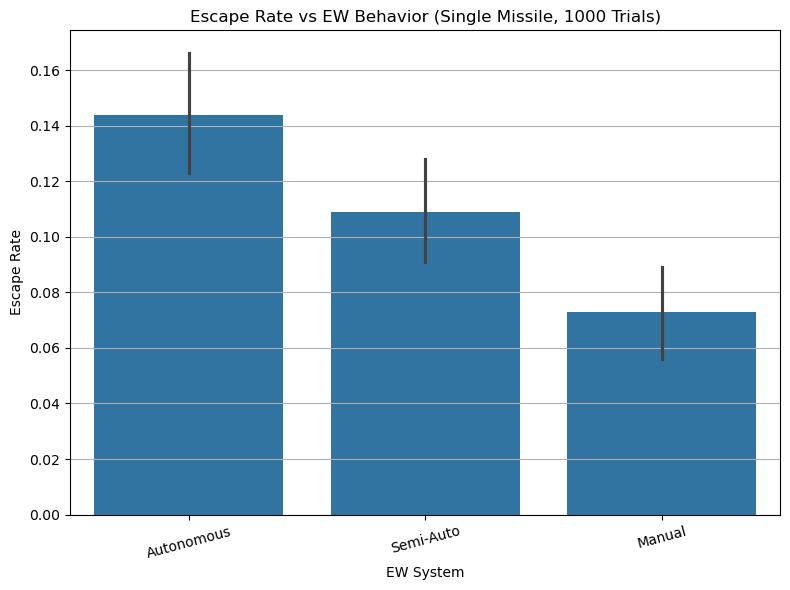

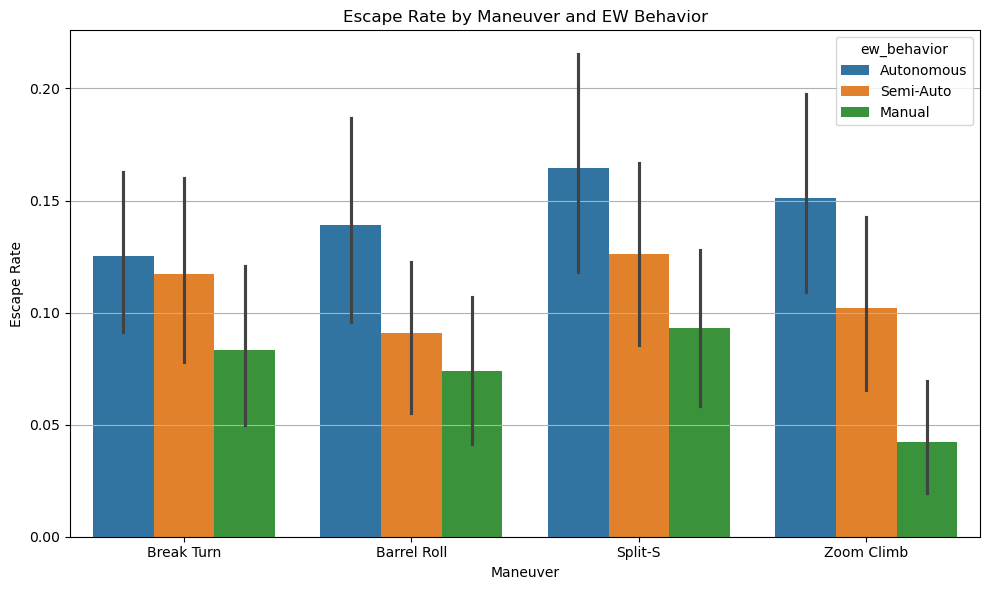

In [5]:
# Missile Escape Simulation (Single Missile Engagement)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

behaviors = {
    "Autonomous": {"ecm_eff": 0.80, "delay_range": (0.5, 1.2)},
    "Semi-Auto": {"ecm_eff": 0.65, "delay_range": (1.5, 3.0)},
    "Manual": {"ecm_eff": 0.45, "delay_range": (2.0, 5.0)}
}

maneuvers = {
    "Break Turn": (6.5, 9.0),
    "Split-S": (6.0, 8.5),
    "Barrel Roll": (5.0, 7.0),
    "Zoom Climb": (4.5, 6.5)
}

seeker_distance_km = 25  # Missile seeker becomes active at this distance
seeker_fov_deg = 60       # Seeker Field of View
missile_g_limit = 40

results = []
n_trials = 1000

def simulate_missile(delay, g_load, ecm_eff, target_angle):
    in_fov = abs(target_angle) <= seeker_fov_deg
    if in_fov:
        maneuver_factor = min(g_load / missile_g_limit, 1.0)
        time_factor = 1.0 if delay < 10 else 0.5  # Heavily penalize long delays
        escape_prob = ecm_eff * maneuver_factor * time_factor
        escaped = np.random.rand() < escape_prob
    else:
        escaped = False
    return escaped

for label, cfg in behaviors.items():
    for _ in range(n_trials):
        delay = np.random.uniform(*cfg["delay_range"])
        maneuver = np.random.choice(list(maneuvers.keys()))
        g_range = maneuvers[maneuver]
        fighter_g = np.random.uniform(*g_range)

        target_angle = np.random.uniform(-60, 60)  # Missile within FOV

        escaped = simulate_missile(delay, fighter_g, cfg["ecm_eff"], target_angle)

        results.append({
            "ew_behavior": label,
            "reaction_delay": delay,
            "maneuver": maneuver,
            "fighter_g": fighter_g,
            "target_angle": target_angle,
            "escaped": escaped
        })

single_df = pd.DataFrame(results)

# Plot: Escape Rate by EW System
plt.figure(figsize=(8,6))
sns.barplot(data=single_df, x="ew_behavior", y="escaped", estimator=np.mean)
plt.title("Escape Rate vs EW Behavior (Single Missile, 1000 Trials)")
plt.ylabel("Escape Rate")
plt.xlabel("EW System")
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot: Escape Rate by Maneuver Type
plt.figure(figsize=(10,6))
sns.barplot(data=single_df, x="maneuver", y="escaped", hue="ew_behavior")
plt.title("Escape Rate by Maneuver and EW Behavior")
plt.ylabel("Escape Rate")
plt.xlabel("Maneuver")
plt.grid(axis='y')
plt.tight_layout()
plt.show()




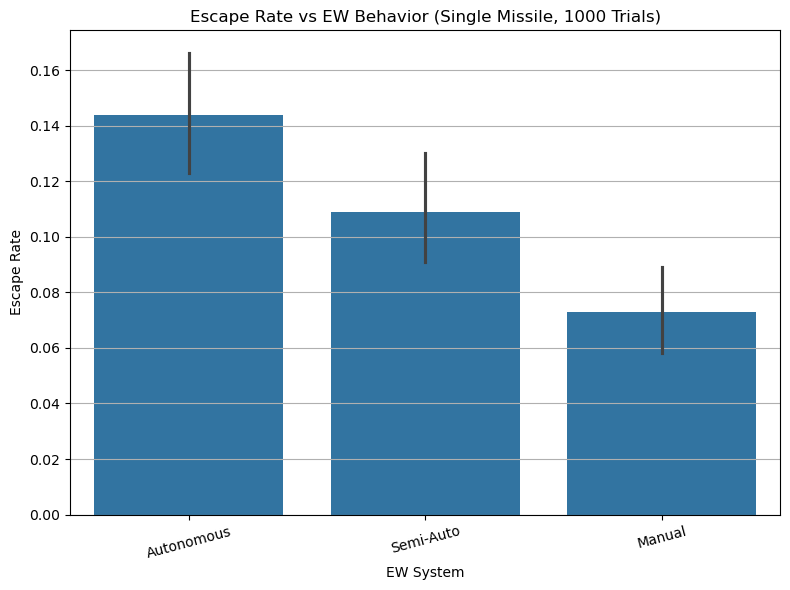

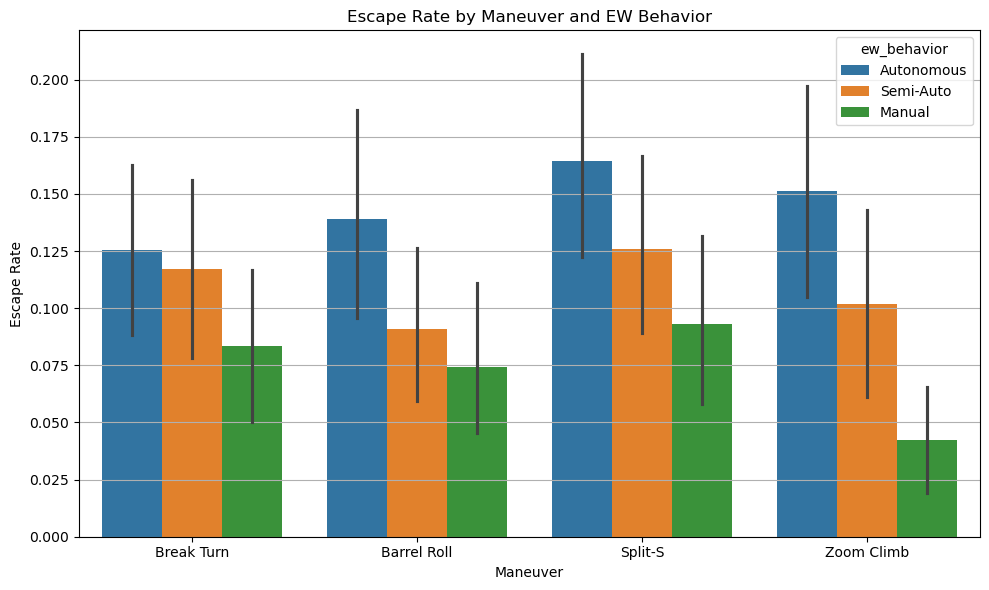

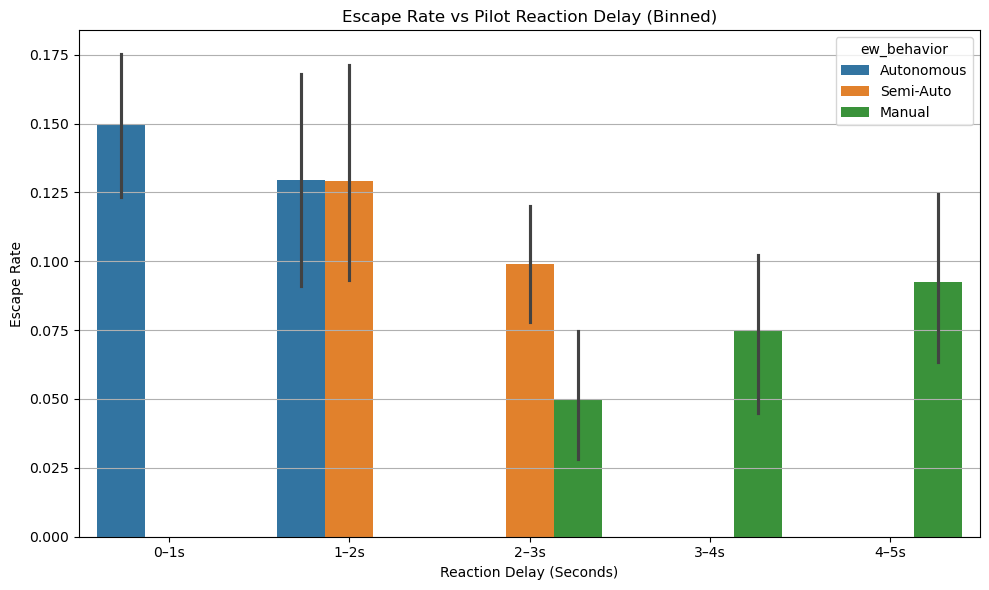

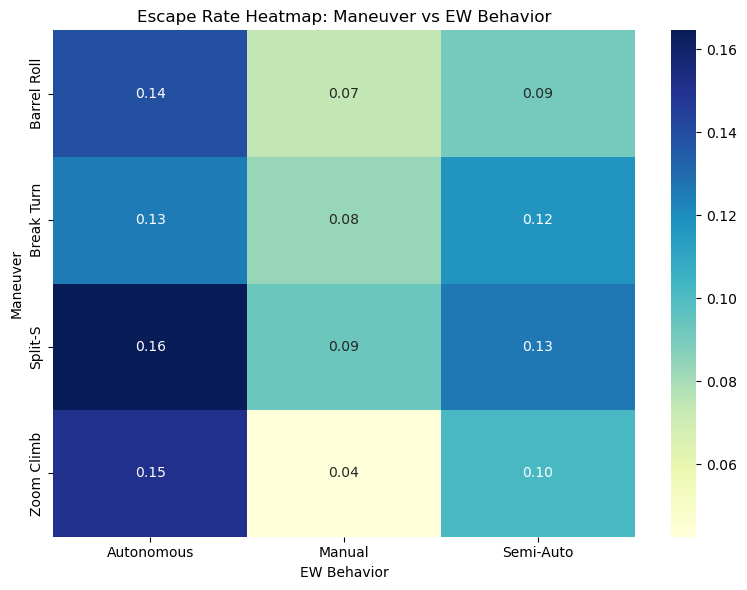

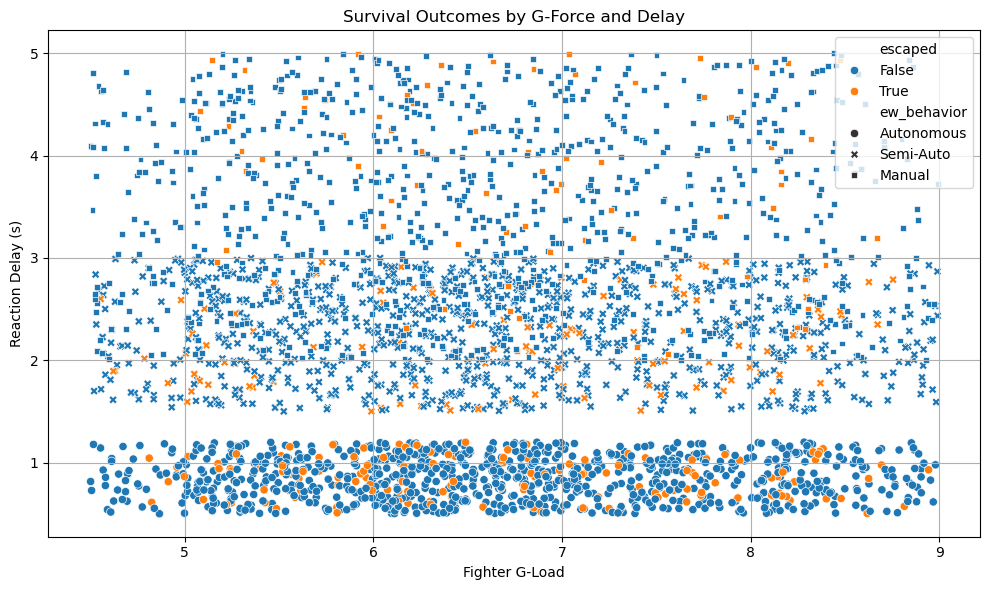

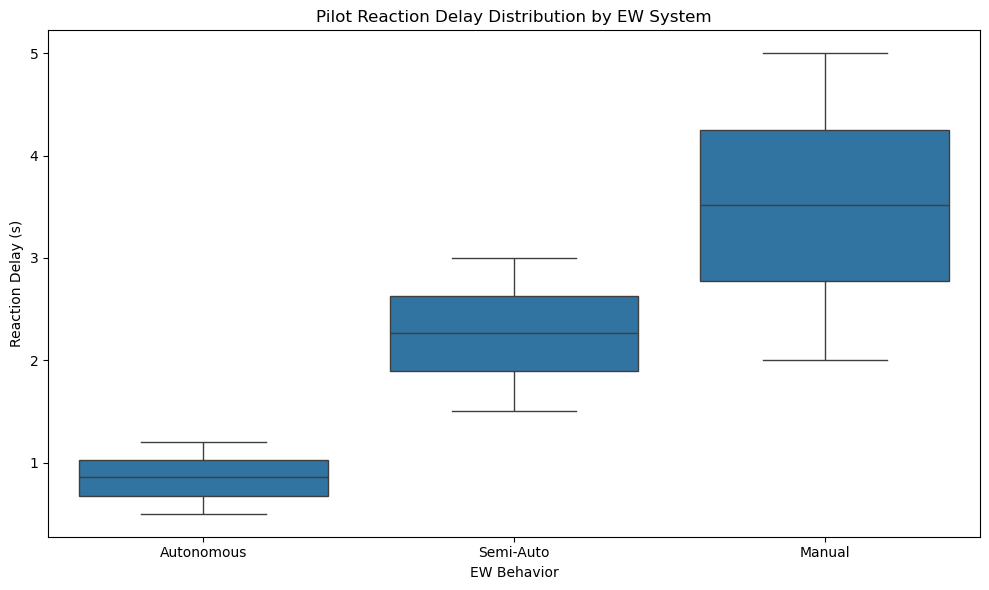

In [15]:
# Missile Escape Simulation (Single Missile Engagement)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

behaviors = {
    "Autonomous": {"ecm_eff": 0.80, "delay_range": (0.5, 1.2)},
    "Semi-Auto": {"ecm_eff": 0.65, "delay_range": (1.5, 3.0)},
    "Manual": {"ecm_eff": 0.45, "delay_range": (2.0, 5.0)}
}

maneuvers = {
    "Break Turn": (6.5, 9.0),
    "Split-S": (6.0, 8.5),
    "Barrel Roll": (5.0, 7.0),
    "Zoom Climb": (4.5, 6.5)
}

seeker_distance_km = 25  # Missile seeker becomes active at this distance
seeker_fov_deg = 60       # Seeker Field of View
missile_g_limit = 40

results = []
n_trials = 1000

def simulate_missile(delay, g_load, ecm_eff, target_angle):
    in_fov = abs(target_angle) <= seeker_fov_deg
    if in_fov:
        maneuver_factor = min(g_load / missile_g_limit, 1.0)
        time_factor = 1.0 if delay < 10 else 0.5  # Heavily penalize long delays
        escape_prob = ecm_eff * maneuver_factor * time_factor
        escaped = np.random.rand() < escape_prob
    else:
        escaped = False
    return escaped

for label, cfg in behaviors.items():
    for _ in range(n_trials):
        delay = np.random.uniform(*cfg["delay_range"])
        maneuver = np.random.choice(list(maneuvers.keys()))
        g_range = maneuvers[maneuver]
        fighter_g = np.random.uniform(*g_range)

        target_angle = np.random.uniform(-60, 60)  # Missile within FOV

        escaped = simulate_missile(delay, fighter_g, cfg["ecm_eff"], target_angle)

        results.append({
            "ew_behavior": label,
            "reaction_delay": delay,
            "maneuver": maneuver,
            "fighter_g": fighter_g,
            "target_angle": target_angle,
            "escaped": escaped
        })

single_df = pd.DataFrame(results)

# Plot: Escape Rate by EW System
plt.figure(figsize=(8,6))
sns.barplot(data=single_df, x="ew_behavior", y="escaped", estimator=np.mean)
plt.title("Escape Rate vs EW Behavior (Single Missile, 1000 Trials)")
plt.ylabel("Escape Rate")
plt.xlabel("EW System")
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot: Escape Rate by Maneuver Type
plt.figure(figsize=(10,6))
sns.barplot(data=single_df, x="maneuver", y="escaped", hue="ew_behavior")
plt.title("Escape Rate by Maneuver and EW Behavior")
plt.ylabel("Escape Rate")
plt.xlabel("Maneuver")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Additional Visualizations

# 1. Escape Rate vs Pilot Reaction Delay (Binned)
single_df['delay_bin'] = pd.cut(single_df['reaction_delay'], bins=[0, 1, 2, 3, 4, 5], labels=['0–1s','1–2s','2–3s','3–4s','4–5s'])

plt.figure(figsize=(10,6))
sns.barplot(data=single_df, x='delay_bin', y='escaped', hue='ew_behavior')
plt.title('Escape Rate vs Pilot Reaction Delay (Binned)')
plt.xlabel('Reaction Delay (Seconds)')
plt.ylabel('Escape Rate')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2. Heatmap: Maneuver vs EW Behavior
pivot = single_df.pivot_table(index='maneuver', columns='ew_behavior', values='escaped', aggfunc='mean')

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Escape Rate Heatmap: Maneuver vs EW Behavior")
plt.xlabel("EW Behavior")
plt.ylabel("Maneuver")
plt.tight_layout()
plt.show()

# 3. Scatter Plot: G-Load vs Reaction Delay and Escape Outcome
plt.figure(figsize=(10,6))
sns.scatterplot(data=single_df, x='fighter_g', y='reaction_delay', hue='escaped', style='ew_behavior')
plt.title("Survival Outcomes by G-Force and Delay")
plt.xlabel("Fighter G-Load")
plt.ylabel("Reaction Delay (s)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Box Plot: Reaction Delay by EW System
plt.figure(figsize=(10,6))
sns.boxplot(data=single_df, x="ew_behavior", y="reaction_delay")
plt.title("Pilot Reaction Delay Distribution by EW System")
plt.ylabel("Reaction Delay (s)")
plt.xlabel("EW Behavior")
plt.tight_layout()
plt.show()
